# _TP especial Fundamentos de la Ciencia de Datos_<br>
### _Grupo 7: Buralli, Todesco, Antúnez_


## <u>Descarga y lectura de archivos<u>

Empezaremos descargando y leyendo los archivos mandados por la cátedra

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

covers_dataset = pd.read_csv('Covers.csv')

Hacemos una vista general para saber de que se trata el dataset, que significan cada una de sus columnas

In [2]:
covers_dataset.head()

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Everybody Everybody,Black Box,4:11,4,0.645,0.795,7,-12.095,1,0.0527,0.3470,0.003890,0.1040,0.535,112.067,87,1990
1,Close To You,Maxi Priest,3:45,4,0.590,0.727,6,-7.955,1,0.0706,0.0259,0.000065,0.0827,0.356,121.966,85,1990
2,Do Me!,Bell Biv DeVoe,3:56,4,0.615,0.534,9,-6.719,0,0.0386,0.1060,0.000018,0.0607,0.193,135.917,84,1990
3,Everything,Jody Watley,4:05,4,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.243,120.006,82,1990
4,What It Takes,Aerosmith,3:21,4,0.672,0.655,10,-5.021,0,0.0310,0.0362,0.000000,0.1170,0.555,134.948,82,1990


## Descripción de las variables<br>
* ```Track```: nombre de la canción
* ```Artist```: nombre del artista o intérprete
* ```Duration```: duración en minutos de la canción
* ```Time_Signature```: número de pulsaciones por compás
* ```Danceability```: medida de que tan bailable es la canción(entre 0 y 1)
* ```Energy```: medida de que tan enérgica es la canción(entre 0 y 1)
* ```Key```: tonalidad de la canción, número entero
* ```Loudness```: volumen de la canción, en decibelios
* ```Mode```: tono mayor o menor(0 o 1, respectivamente)
* ```Speechiness```: medida de presencia de palabras habladas en las canciones, valores altos indican una alta presencia de estas palabras
* ```Acoustiness```: mide que tan acústica es la pista
* ```Instrumentalness```: mide la presencia de voces en las canciones, valores más altos indican una canción con mayor parte instrumental
* ```Liveness```: probabilidad de que dicha canción se haya interpretado en vivo, niveles más altos indican mayor presencia de voces de la audiencia
* ```Valance```: medida de la positividad de la canción, niveles más altos indican presencias de mlodías alegres
* ```Tempo```: velocidad de la pista, medida en beats por minutos(BPM)
* ```Popularity```: puntuación de la canción que mide su popularidad
* ```Year```: año de lanzamiento

Identificaremos la cantidad de nulos mediante el comando ```isna()```

In [3]:
covers_dataset.isna().sum()

Track               0
Artist              0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Year                0
dtype: int64

Observamos que no hay NaNs, pero esto no descarta la presencia de valores extraños a analizar en las distintas columnas, por lo que verificaremos mediante el método ```value_count()```

## <u>Revision de valores<u>

In [4]:
covers_dataset["Track"].value_counts()

Track
Hold On                    3
I’ll Be There              2
Crazy                      2
Always                     2
Everything                 2
                          ..
I’m Your Angel             1
Taking Everything          1
What’s It Gonna Be?!       1
Almost Doesn’t Count       1
It Ain’t My Fault 1 & 2    1
Name: count, Length: 892, dtype: int64

En ```Track``` parece no haber presencia de valores raros, si algunos nombres repetidos.

In [5]:
covers_dataset["Artist"].value_counts()

Artist
Mariah Carey                       16
Madonna                            14
Janet Jackson                      13
Boyz II Men                        11
Whitney Houston                    10
                                   ..
112 featuring Lil Zane              1
LFO                                 1
Jive Bunny and the Mastermixers     1
Biz Markie                          1
the Righteous Brothers              1
Name: count, Length: 535, dtype: int64

Con ```Artist``` parace algo similar, nada extraño a primera vista

In [6]:
covers_dataset["Duration"].value_counts()

Duration
3:48    12
3:55    12
4:18    11
3:59    11
3:38    10
        ..
4:06     1
2:55     1
2:46     1
2:07     1
4:46     1
Name: count, Length: 253, dtype: int64

```Duration``` tampoco parece tener valores atípicos, aunque luego abria que convertir el dato a algo numerico.

In [7]:
covers_dataset['Time_Signature'].value_counts()

Time_Signature
4    865
3     45
5      6
1      3
Name: count, dtype: int64

```Time_Signature``` parece correcto.

In [8]:
covers_dataset['Danceability'].value_counts()
danceability = covers_dataset['Danceability']

En ```Danceability``` no parece que haya nada raro... Hagamos un boxplot para ver mas en detalle.

In [9]:
covers_dataset['Danceability'].min()
covers_dataset['Danceability'].max()
covers_dataset['Danceability'].median()
danceability.describe()

count    919.000000
mean       0.622967
std        0.154782
min        0.135000
25%        0.518500
50%        0.631000
75%        0.738000
max        0.979000
Name: Danceability, dtype: float64

In [10]:
covers_dataset['Energy'].value_counts()

Energy
0.521    8
0.453    6
0.498    6
0.538    6
0.640    5
        ..
0.347    1
0.388    1
0.362    1
0.805    1
0.208    1
Name: count, Length: 522, dtype: int64

A primera vista no parece haber valores extraño.

In [11]:
covers_dataset['Key'].value_counts()

Key
1     106
7     104
5      91
9      91
0      90
6      73
11     72
10     68
2      65
4      64
8      57
3      38
Name: count, dtype: int64

Todo parece normal en ```Key```.

In [12]:
covers_dataset['Loudness'].value_counts()

Loudness
-5.484     3
-8.412     3
-10.419    3
-5.109     3
-7.440     3
          ..
-10.952    1
-5.395     1
-4.699     1
-7.063     1
-8.422     1
Name: count, Length: 842, dtype: int64

Sospechosos los valores que se repiten 3 veces siendo una variable continua pero aceptable...

In [13]:
covers_dataset['Mode'].value_counts()

Mode
1    602
0    317
Name: count, dtype: int64

Predominancia del valor de 1 en ```Mode```.

In [14]:
covers_dataset['Speechiness'].value_counts()

Speechiness
0.0352    9
0.0321    8
0.0270    8
0.0277    7
0.0279    7
         ..
0.0670    1
0.1550    1
0.0383    1
0.0384    1
0.0632    1
Name: count, Length: 488, dtype: int64

Valores repetidos en una variable continua. Candidatos a invertigacion: 0.0352,0.0321,0.0270    

In [15]:
covers_dataset['Acousticness'].value_counts()

Acousticness
0.11800    5
0.21500    5
0.13900    4
0.20000    4
0.11400    4
          ..
0.48600    1
0.00107    1
0.06860    1
0.01340    1
0.85500    1
Name: count, Length: 676, dtype: int64

Hay valores repetidos 5 veces, puede investigarse...

In [16]:
covers_dataset['Instrumentalness'].value_counts()

Instrumentalness
0.000000    375
0.109000      4
0.000106      3
0.000018      3
0.000163      3
           ... 
0.000096      1
0.000023      1
0.011500      1
0.000043      1
0.000519      1
Name: count, Length: 489, dtype: int64

Muchos registros con 0 de ```Instrumentalness```, asumimos que 0 significa que la cancion es "Acapella" valores altos de ```instrumentalness``` como bien describimos al principio corresponden o "deberian" corresponder a canciones con mayor presencia instrumental. Mientras que valores menores indican lo contrario. Resaltamos el ```deberia``` porque investigando algunas canciones con valores ```instrumentalness``` estas si poseen instrumentacion.

In [17]:
covers_dataset['Instrumentalness'].max()

np.float64(0.987)

In [18]:
covers_dataset['Liveness'].value_counts()

Liveness
0.1090    14
0.1080    13
0.1040    12
0.1060    11
0.1030    11
          ..
0.0476     1
0.0933     1
0.0630     1
0.0613     1
0.0779     1
Name: count, Length: 499, dtype: int64

A primera vista no sabemos bien la razon pero en ```Liveness``` hay valores repetidos en 0.1xxx osea todos los valores que son 0.1 y algo mas.

In [19]:
covers_dataset['Valence'].value_counts()

Valence
0.287    6
0.781    5
0.510    5
0.421    5
0.144    5
        ..
0.342    1
0.550    1
0.796    1
0.624    1
0.960    1
Name: count, Length: 570, dtype: int64

Algunos valores repetidos en ```Valence``` pero zafa...

In [20]:
covers_dataset['Tempo'].value_counts()

Tempo
118.777    3
100.002    3
83.943     2
118.402    2
119.973    2
          ..
98.572     1
113.722    1
127.969    1
71.582     1
132.889    1
Name: count, Length: 873, dtype: int64

Aceptable, quizas los valores 118.777 y 100.002 podrian revisarse, tampoco que se repitan tanto en ```Tempo```

In [21]:
covers_dataset['Popularity'].value_counts()

Popularity
59    30
69    28
57    27
64    27
63    27
      ..
4      1
16     1
92     1
89     1
25     1
Name: count, Length: 82, dtype: int64

Variable discreta asi que esta bien que se repitan cosas. Tampoco exageremos!

In [22]:
covers_dataset['Year'].value_counts()

Year
1991    100
1990     99
1999     96
1992     95
1993     94
1994     91
1998     91
1997     89
1995     86
1996     78
Name: count, dtype: int64

Vemos que todas las canciones son de los '90, pero nada extraño que destacar.

**Nota: Relacionar las variables Valance y Tempo(¿la velocidad se relaciona a la positividad de la canción?)**

### <u>Corrección de tipos<u> 

 Ahora nos ocuparemos de comprobar que los tipos de las variables sean adecuados a lo que representan. Para ello, usamos el método ```info()```

In [23]:
covers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             919 non-null    object 
 1   Artist            919 non-null    object 
 2   Duration          919 non-null    object 
 3   Time_Signature    919 non-null    int64  
 4   Danceability      919 non-null    float64
 5   Energy            919 non-null    float64
 6   Key               919 non-null    int64  
 7   Loudness          919 non-null    float64
 8   Mode              919 non-null    int64  
 9   Speechiness       919 non-null    float64
 10  Acousticness      919 non-null    float64
 11  Instrumentalness  919 non-null    float64
 12  Liveness          919 non-null    float64
 13  Valence           919 non-null    float64
 14  Tempo             919 non-null    float64
 15  Popularity        919 non-null    int64  
 16  Year              919 non-null    int64  
dt

Hacemos una copia mediante el método ```copy()``` para no arruinar el dataset original

In [24]:
copy_covers_ds = covers_dataset.copy()

Convertimos el tipo de dato de la columna ```Mode``` de entero a booleano para hacer el análisis

In [25]:
copy_covers_ds['Mode'] = copy_covers_ds['Mode'].astype(bool)

Ahora nos centraremos en arreglar el tipo de la variable ```Duration```, convirtiendolo de string a integer(segundos)

In [26]:
#Por las dudas hacemos un cambio de tipos a string.
copy_covers_ds['Duration'] = copy_covers_ds['Duration'].astype(str)
#Creamos la nueva columna con los valores correctos convertidos a segundos(todavia no estan los valores).
copy_covers_ds['DURATION(s)'] = 0
#Por cada registro hacemos:
for index,row in copy_covers_ds.iterrows():
    #duracion original se vuelve el valor de duracion de la fila.
    duracion_original = row['Duration']
    #Separamos por : los minutos y segundos.
    minutos , segundos = duracion_original.split(':')
    #Asignamos los minutos * 60 + los segundos obtenidos a la fila en la columna nueva, casteamos ambos parametros a segundos porque sino hace cualquier cosa.
    copy_covers_ds.at[index,'DURATION(s)'] = int(minutos) * 60 + int(segundos)
#Mostramos resultados.
copy_covers_ds.head()

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
0,Everybody Everybody,Black Box,4:11,4,0.645,0.795,7,-12.095,True,0.0527,0.3470,0.003890,0.1040,0.535,112.067,87,1990,251
1,Close To You,Maxi Priest,3:45,4,0.590,0.727,6,-7.955,True,0.0706,0.0259,0.000065,0.0827,0.356,121.966,85,1990,225
2,Do Me!,Bell Biv DeVoe,3:56,4,0.615,0.534,9,-6.719,False,0.0386,0.1060,0.000018,0.0607,0.193,135.917,84,1990,236
3,Everything,Jody Watley,4:05,4,0.704,0.225,6,-14.454,False,0.0994,0.9020,0.657000,0.1060,0.243,120.006,82,1990,245
4,What It Takes,Aerosmith,3:21,4,0.672,0.655,10,-5.021,False,0.0310,0.0362,0.000000,0.1170,0.555,134.948,82,1990,201


## <u>Analisis de distribuciones<u>


Ahora observaremos como se distribuye cada variable para poder aprender un poco sobre el conjunto de datos y obtener conclusiones. Tomaremos las variables más interesantes para analizar y cuyo gráfico nos pueda aportar algo de valor

### Analisis de ```Valence```

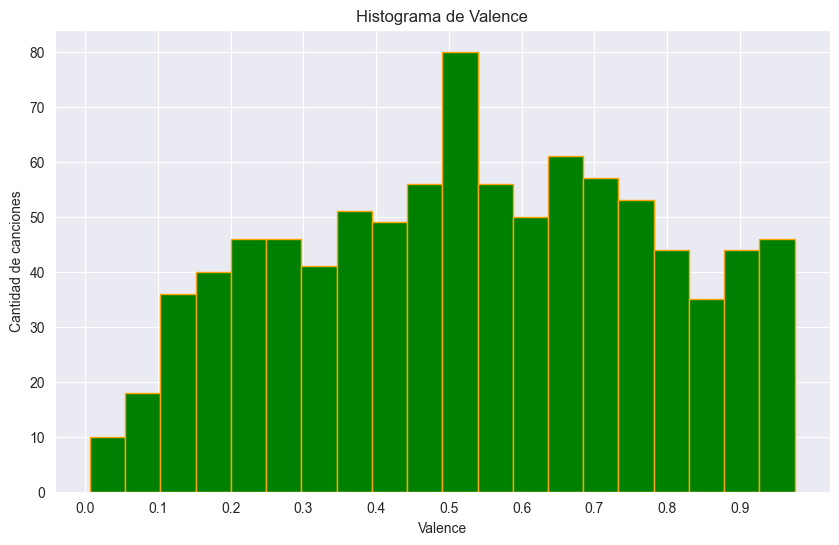

In [27]:
import numpy as np

# Ordenamos los datos
valence_sort = copy_covers_ds['Valence'].sort_values()

# Definimos el número de intervalos (bins)
bins = 20

# Graficamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(valence_sort, bins=bins, color='green', edgecolor='orange')

# Añadimos título y etiquetas
plt.title('Histograma de Valence')
plt.xlabel('Valence')
plt.ylabel('Cantidad de canciones')
plt.xticks(np.arange(0,1,0.1))

# Mostramos el gráfico
plt.show()

La curva se ve bastante balanceada, hay un pico justo en el centro de la distribucion lo que indica una gran cantidad de canciones con una valenic apromedio.

In [28]:
mas_valencia =  copy_covers_ds[covers_dataset['Valence'] > 0.95].sort_values('Valence')
mas_valencia

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
461,Cantaloop (FLIP Fantasia),Us3,4:39,4,0.852,0.655,5,-11.498,False,0.0645,0.1070,0.000021,0.1370,0.952,115.962,49,1994,279
430,Wild Night,John Mellencamp featuring Me’shell Ndegeocello,3:33,4,0.568,0.714,7,-7.139,True,0.0445,0.1740,0.000000,0.0429,0.955,146.338,62,1994,213
484,Come And Get Your Love,Real McCoy,3:25,4,0.731,0.804,11,-7.621,False,0.0473,0.1720,0.000280,0.0685,0.957,107.383,82,1995,205
631,Key West Intermezzo (I Saw You First),John Mellencamp,4:54,4,0.673,0.858,11,-6.511,True,0.0270,0.0050,0.000019,0.2740,0.959,116.477,45,1996,294
860,(YOU Drive Me) Crazy,Britney Spears,3:18,4,0.748,0.939,0,-4.288,False,0.0341,0.0534,0.000000,0.3200,0.960,104.001,66,1999,198
111,Power Of Love/Love Power,Luther Vandross,3:54,4,0.768,0.828,5,-5.109,True,0.0313,0.0964,0.000029,0.0970,0.961,118.777,75,1991,234
401,The Power Of Love,Céline Dion,3:54,4,0.768,0.828,5,-5.109,True,0.0313,0.0964,0.000029,0.0970,0.961,118.777,75,1994,234
18,The Power,Snap!,3:54,4,0.768,0.828,5,-5.109,True,0.0313,0.0964,0.000029,0.0970,0.961,118.777,75,1990,234
221,Achy Breaky Heart,Billy Ray Cyrus,3:23,4,0.800,0.563,9,-10.209,True,0.0303,0.0510,0.000000,0.0797,0.961,121.808,68,1992,203
836,Smooth,Santana featuring Rob Thomas,4:18,4,0.734,0.580,9,-6.619,False,0.0321,0.2380,0.000600,0.0298,0.962,119.336,79,1999,258


In [29]:
menos_valencia =  copy_covers_ds[covers_dataset['Valence'] < 0.05].sort_values('Valence')
menos_valencia

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
295,Rain,Madonna,2:11,5,0.231,0.97600,10,-27.426,False,0.0487,0.1520,0.987000,0.4800,0.00672,96.552,81,1993,131
53,Release Me,Wilson Phillips,2:49,1,0.152,0.00504,0,-34.183,True,0.0432,0.9530,0.928000,0.1020,0.03030,136.702,57,1990,169
762,Frozen,Madonna,2:41,4,0.179,0.00580,0,-37.260,True,0.0481,0.9240,0.929000,0.1060,0.03140,72.177,67,1998,161
294,If,Janet Jackson,2:52,4,0.457,0.49900,1,-6.670,True,0.0334,0.2470,0.000063,0.1710,0.03480,127.950,84,1993,172
143,This House,Tracie Spencer,3:40,4,0.527,0.14200,4,-17.440,True,0.0277,0.9550,0.764000,0.0917,0.03690,105.960,59,1991,220
323,Connected,Stereo MC’s,3:16,4,0.135,0.00134,2,-42.950,True,0.0496,0.9690,0.972000,0.0884,0.03720,141.488,66,1993,196
748,My Heart Will Go On,Celine Dion,4:40,1,0.428,0.27600,4,-11.729,True,0.0312,0.7320,0.000005,0.1170,0.03820,99.195,75,1998,280
411,So Much In Love,All-4-One,2:58,4,0.522,0.95300,2,-4.347,True,0.0833,0.0722,0.000633,0.2110,0.03960,131.937,69,1994,178
685,I Believe I Can Fly,R. Kelly,5:20,4,0.550,0.44400,7,-7.588,True,0.0292,0.2410,0.000000,0.1870,0.04380,120.179,59,1997,320
780,Victory,Puff Daddy featuring The Notorious B.I.G. and ...,3:58,4,0.597,0.75500,4,-2.209,False,0.0520,0.0423,0.000000,0.5820,0.04670,89.146,60,1998,238


### Analisis de ```Popularity```

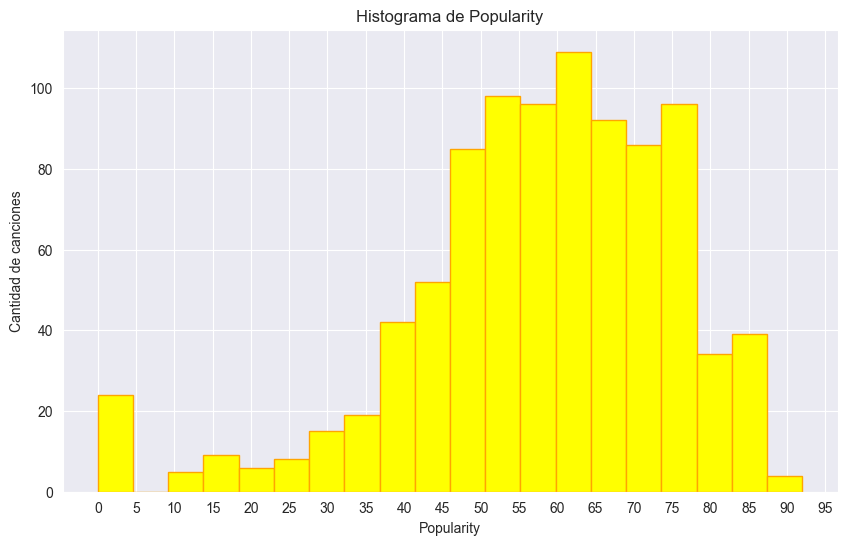

In [30]:
import numpy as np

# Ordenamos los datos
popularity_sort = copy_covers_ds['Popularity'].sort_values()

# Definimos el número de intervalos (bins)
bins = 20

# Graficamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(popularity_sort, bins=bins, color='yellow', edgecolor='orange')

# Añadimos título y etiquetas
plt.title('Histograma de Popularity')
plt.xlabel('Popularity')
plt.ylabel('Cantidad de canciones')
plt.xticks(np.arange(0,100,5))

# Mostramos el gráfico
plt.show()

Podemos ver una curva bastante sesgada hacia la izquierda. Analicemos las canciones con mas popularidad!

In [31]:
mas_populares =  copy_covers_ds[covers_dataset['Popularity'] > 85].sort_values('Popularity')
mas_populares

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
99,Romantic,Karyn White,2:12,4,0.571,0.544,6,-10.613,True,0.0299,0.45300,0.008050,0.3220,0.216,132.052,86,1991,132
565,Nobody,Keith Sweat featuring Athena Cage,3:00,3,0.358,0.284,7,-8.285,True,0.0285,0.80500,0.000000,0.1830,0.276,99.796,86,1996,180
481,Creep,TLC,3:58,4,0.515,0.430,7,-9.935,True,0.0372,0.00970,0.000133,0.1290,0.104,91.844,86,1995,238
480,Believe,Elton John,3:24,4,0.776,0.780,10,-4.374,False,0.1280,0.06220,0.000000,0.0810,0.666,124.949,86,1995,204
645,Pony,Ginuwine,4:18,4,0.610,0.650,6,-6.199,True,0.0474,0.39900,0.000000,0.1100,0.507,106.719,86,1997,258
735,The Boy Is Mine,Brandy and Monica,2:53,4,0.795,0.630,7,-5.854,False,0.0434,0.15700,0.000000,0.0732,0.447,97.998,86,1998,173
644,Nobody,Keith Sweat,3:00,3,0.358,0.284,7,-8.285,True,0.0285,0.80500,0.000000,0.1830,0.276,99.796,86,1997,180
825,All Night Long,Faith Evans featuring Puff Daddy,3:30,4,0.532,0.767,7,-5.509,True,0.0574,0.00287,0.000513,0.3900,0.755,127.361,86,1999,210
826,All Star,Smash Mouth,3:52,4,0.695,0.633,8,-4.946,True,0.0599,0.06120,0.000195,0.0926,0.557,96.782,86,1999,232
827,Believe,Cher,3:24,4,0.776,0.780,10,-4.374,False,0.1280,0.06220,0.000000,0.0810,0.666,124.949,86,1999,204


Ahora las menos populares!

In [32]:
menos_populares =  copy_covers_ds[covers_dataset['Popularity'] < 15].sort_values('Popularity')
menos_populares

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
198,I Can’t Wait Another Minute,Hi-Five,4:37,4,0.640,0.448,8,-15.519,True,0.0556,0.202000,0.000000,0.0680,0.6840,148.076,0,1991,277
98,I’ll Be Your Shelter,Taylor Dayne,4:39,4,0.467,0.392,8,-7.556,True,0.0280,0.105000,0.001430,0.1180,0.3240,129.850,0,1990,279
97,I’ll Be Your Everything,Tommy Page,3:13,4,0.516,0.663,6,-6.027,False,0.0365,0.000180,0.829000,0.1030,0.6220,193.990,0,1990,193
96,(CAN’T Live Without Your) Love And Affection,Nelson,4:03,4,0.852,0.907,4,-5.571,True,0.0439,0.259000,0.000188,0.0667,0.9640,120.043,0,1990,243
387,That’s The Way Love Goes,Janet Jackson,1:57,4,0.558,0.310,7,-14.463,True,0.0318,0.921000,0.001850,0.5910,0.4020,97.253,0,1993,117
386,I’ll Never Get Over You (GETTING Over Me),Exposé,3:48,4,0.405,0.394,8,-7.692,True,0.0289,0.139000,0.000000,0.2570,0.0984,171.999,0,1993,228
293,That’s What Love Is For,Amy Grant,3:25,4,0.529,0.758,9,-5.950,True,0.0372,0.116000,0.004950,0.1610,0.7980,97.865,0,1992,205
563,I’d Lie For You (AND That’s The Truth),Meat Loaf,4:26,4,0.483,0.544,2,-10.597,True,0.0343,0.610000,0.709000,0.1010,0.2980,171.923,0,1995,266
641,Old Man And Me (WHEN I Get To Heaven),Hootie & the Blowfish,4:29,4,0.466,0.612,4,-9.155,True,0.0355,0.527000,0.000000,0.0948,0.7810,98.014,0,1996,269
642,Tonite’s Tha Night,Kris Kross,3:20,4,0.570,0.634,8,-17.278,True,0.0314,0.015700,0.931000,0.2570,0.5650,140.022,0,1996,200


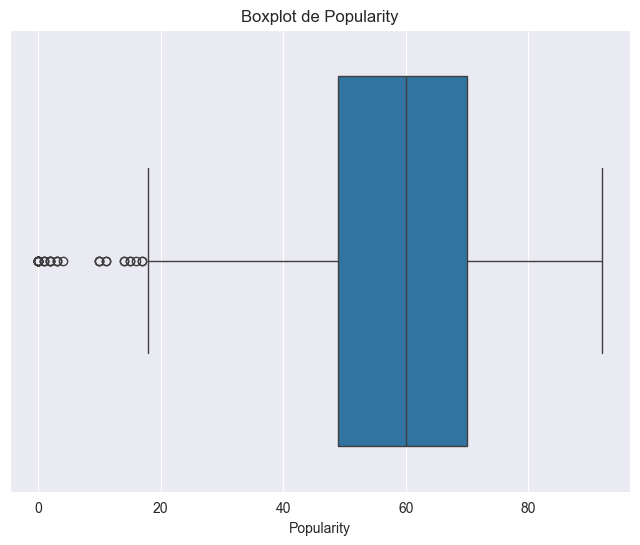

In [33]:
# Nos quedamos solo con la columna Danceability
popularity = covers_dataset["Popularity"]

# Creamos el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=popularity)
plt.title("Boxplot de Popularity")
plt.xlabel("Popularity")
plt.show()

Podrian eliminarse las canciones con pupularidad cerna a 0, tampco exageremos y borremos todas, pero cancion con una popularidad de 0 no nos inspira muchha confianza.

El box plot confirma una tendencia a valores mas altos de popularidad y tambien detecta algunos outliers. En el histograma se veia una concentracion de canciones con popularidad entre 0 y 5. No son canciones conocidas las que se concentran ahi pero nos resulta un poco raro. La variable en si es rara, no sabemos en base a que fue medida la popularidad de la cancion. Los valores pueden estar condicionados debido a que el dataset esta acotado a covers de los 90s, si los datos fueron recuperados cercanamente a la decada de los noventa por ejemplo los 2000s las personas escucharian estos covers mas que si nos alejaramos de los 90s y a medida que saldrian nuevas canciones y covers los valores se verian disminuidos  .Quizas recolectaron datos de otra aplicacion o de alguna plataforma de musica. Tampcoo sabemos que usaron de parametro para medirla, si las escuchas mensuales, discos vendidos, me gustas etc.

### Analisis de ```Danceability```

Con el método ```value_counts()``` no se vió nada extraño. Por lo tanto, vamos a hacer un boxplot para ver mas en detalle la distribución de la variable.

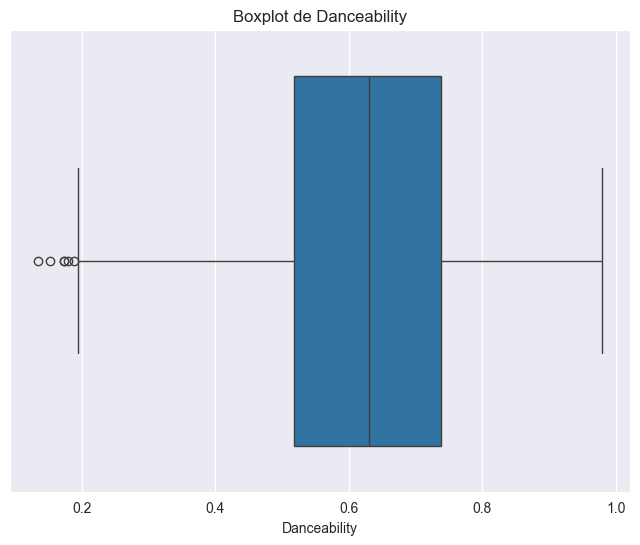

In [34]:
# Nos quedamos solo con la columna Danceability
danceability = covers_dataset["Danceability"]

# Creamos el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=danceability)
plt.title("Boxplot de Danceability")
plt.xlabel("Danceability")
plt.show()

In [35]:
min = copy_covers_ds["Danceability"].min()
copy_covers_ds[copy_covers_ds["Danceability"] == min]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
323,Connected,Stereo MC’s,3:16,4,0.135,0.00134,2,-42.95,True,0.0496,0.969,0.972,0.0884,0.0372,141.488,66,1993,196


Parece que hay unos valores del lado izquierdo, podrian ser posibles outliers. 

Podemos observar esta distribución de una forma más clara mediante un histograma

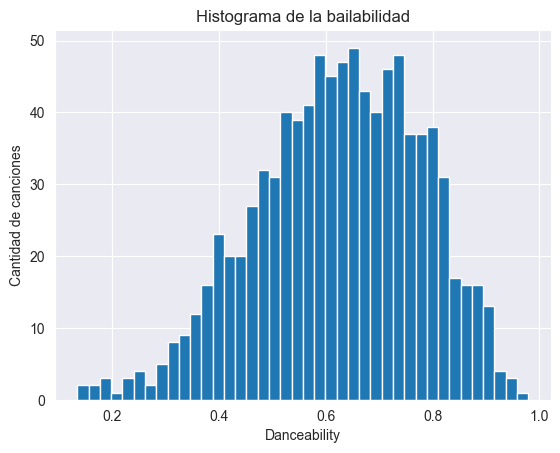

In [36]:
bins = 40

plt.hist(copy_covers_ds['Danceability'], bins = bins)

plt.xlabel('Danceability')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de la bailabilidad')
plt.show()

In [37]:
#Vamos a mirar quiénes son las canciones que son poco bailables
poco_bailables = copy_covers_ds[copy_covers_ds["Danceability"] < 0.2]
poco_bailables

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
53,Release Me,Wilson Phillips,2:49,1,0.152,0.00504,0,-34.183,True,0.0432,0.95300,0.928000,0.1020,0.0303,136.702,57,1990,169
323,Connected,Stereo MC’s,3:16,4,0.135,0.00134,2,-42.950,True,0.0496,0.96900,0.972000,0.0884,0.0372,141.488,66,1993,196
336,Dre Day,Dr. Dre featuring Snoop Doggy Dogg,1:55,4,0.188,0.84700,8,-3.268,True,0.0340,0.07680,0.320000,0.1210,0.3890,88.494,61,1993,115
394,Always,Bon Jovi,3:43,4,0.174,0.74200,8,-5.930,True,0.0485,0.00181,0.281000,0.1980,0.3600,163.378,78,1994,223
395,Always,Erasure,3:43,4,0.174,0.74200,8,-5.930,True,0.0485,0.00181,0.281000,0.1980,0.3600,163.378,78,1994,223
544,Ask Of You,Raphael Saadiq,4:54,3,0.194,0.11900,1,-20.926,True,0.0398,0.85400,0.000737,0.1090,0.1400,85.698,52,1995,294
762,Frozen,Madonna,2:41,4,0.179,0.00580,0,-37.260,True,0.0481,0.92400,0.929000,0.1060,0.0314,72.177,67,1998,161


Podemos ver que, por ejemplo, "Frozen" de Madonna es una canción poco bailable. En particular, 3 de las 7 canciones menos bailables son también poco enérgicas, por lo que valdría la pena en un futuro análisis corroborar si existe una correlación fuerte entre ```Danceability``` y ```Energy```

### Analisis de ```Duration```

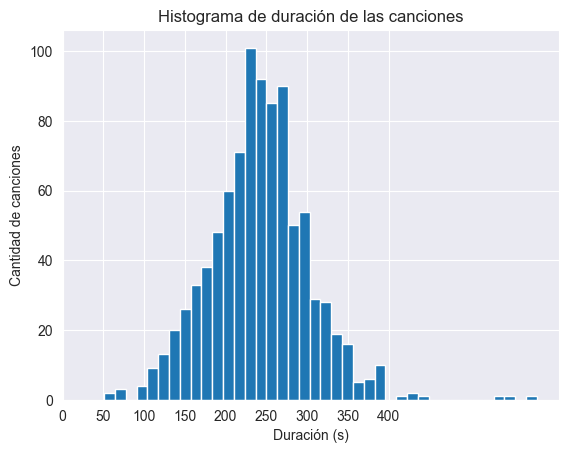

In [38]:
bins = 40

plt.hist(copy_covers_ds['DURATION(s)'], bins = bins)

plt.xlabel('Duración (s)')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de duración de las canciones')
plt.xticks(range(0, 450, 50))
plt.show()

Se puede ver que la mayoría de las canciones duran entre 150 y 300 segundos(2:30 y 5:00 minutos). Hay algunos outliers que superan los 500 segundos(8:33 minutos) y hay que corroborrar que sean correctos

In [39]:
max = copy_covers_ds["DURATION(s)"].max()
copy_covers_ds[copy_covers_ds["DURATION(s)"] == max]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
699,Feels So Good,Mase,9:42,4,0.576,0.603,5,-9.603,True,0.0329,0.455,0.0537,0.0406,0.524,103.658,51,1997,582


Corroboramos en internet que la canción dura 3:29 minutos, paro no meter mano en los datos podemos simplemente borrar estos tres outliers para que no molesten.

In [40]:
copy_covers_ds[copy_covers_ds['DURATION(s)'] > 500]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
204,November Rain,Guns N’ Roses,8:56,4,0.294,0.640,11,-9.316,True,0.0291,0.016,0.22000,0.1120,0.226,79.790,78,1992,536
485,Runaway,Janet Jackson,9:07,4,0.374,0.568,1,-3.825,False,0.1090,0.219,0.00219,0.5130,0.111,84.733,80,1995,547
699,Feels So Good,Mase,9:42,4,0.576,0.603,5,-9.603,True,0.0329,0.455,0.05370,0.0406,0.524,103.658,51,1997,582


La segunda canción más larga es "November Rain" de Guns 'n Roses y su duración concuerda con el dataset

Podemos tomar como medida eliminar estos tres outliers que nos estan afectando la distribucion en la curva.

In [41]:
copy_covers_ds = copy_covers_ds[copy_covers_ds['DURATION(s)'] < 500]

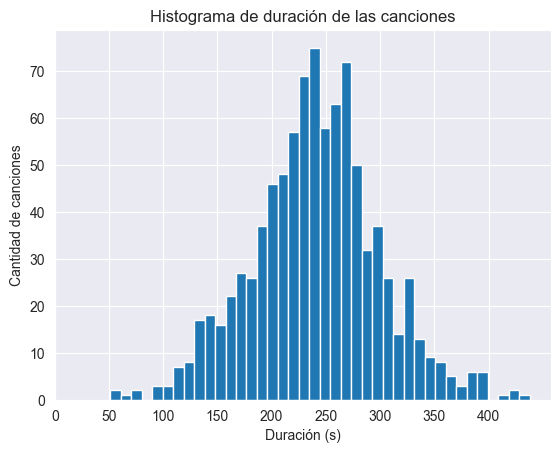

In [42]:
bins = 40

plt.hist(copy_covers_ds['DURATION(s)'], bins = bins)

plt.xlabel('Duración (s)')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de duración de las canciones')
plt.xticks(range(0, 450, 50))
plt.show()

Ahora si ;)

### Analisis de ```Loudness```

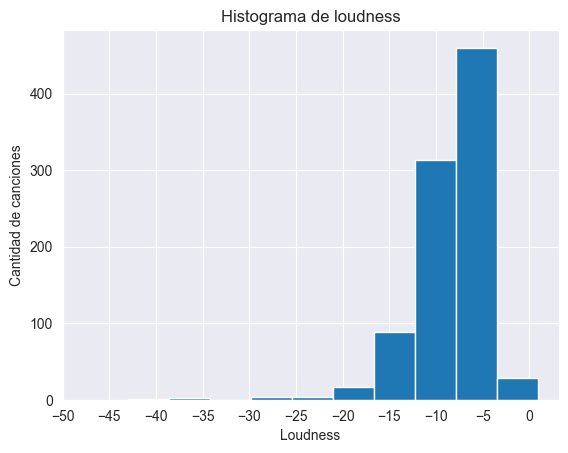

In [43]:
bins = 10

plt.hist(copy_covers_ds['Loudness'], bins = bins)

plt.xlabel('Loudness')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de loudness')
plt.xticks(range(-50, 5, 5))
plt.show()

Podemos ver que hay algunos valores que son minoria abajo de -20db, veamos quienes son.

In [44]:
copy_covers_ds[copy_covers_ds['Loudness'] < -20]


,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
53,Release Me,Wilson Phillips,2:49,1,0.152,0.00504,0,-34.183,True,0.0432,0.953,0.928000,0.1020,0.03030,136.702,57,1990,169
92,This One’s For The Children,New Kids on the Block,3:09,4,0.815,0.10500,0,-20.005,True,0.2570,0.990,0.934000,0.1130,0.54300,96.860,11,1990,189
226,When A Man Loves A Woman,Michael Bolton,2:53,3,0.516,0.15000,1,-20.410,True,0.0272,0.130,0.075500,0.1220,0.20500,97.398,66,1992,173
235,Beauty And The Beast,Celine Dion and Peabo Bryson,2:47,4,0.432,0.08770,8,-27.006,True,0.0680,0.995,0.922000,0.1170,0.14900,79.203,60,1992,167
266,Thinkin’ Back,Color Me Badd,2:04,4,0.648,0.04060,9,-22.391,True,0.0459,0.983,0.931000,0.1030,0.67200,77.071,49,1992,124
295,Rain,Madonna,2:11,5,0.231,0.97600,10,-27.426,False,0.0487,0.152,0.987000,0.4800,0.00672,96.552,81,1993,131
323,Connected,Stereo MC’s,3:16,4,0.135,0.00134,2,-42.950,True,0.0496,0.969,0.972000,0.0884,0.03720,141.488,66,1993,196
544,Ask Of You,Raphael Saadiq,4:54,3,0.194,0.11900,1,-20.926,True,0.0398,0.854,0.000737,0.1090,0.14000,85.698,52,1995,294
557,No More I Love You’s,Annie Lennox,3:07,4,0.364,0.02920,3,-21.088,True,0.0594,0.991,0.963000,0.0912,0.14600,166.335,40,1995,187
762,Frozen,Madonna,2:41,4,0.179,0.00580,0,-37.260,True,0.0481,0.924,0.929000,0.1060,0.03140,72.177,67,1998,161


Son en total 12 canciones, de las cuales hay un valor min. Cercano a -40.

In [45]:
loudness = copy_covers_ds['Loudness']
loudness.describe()

count    916.000000
mean      -8.351585
std        3.895975
min      -42.950000
25%      -10.172000
50%       -7.596500
75%       -5.753500
max        0.919000
Name: Loudness, dtype: float64

Vemos que hay un valor minimo de -42. La verdad que no sabemos bien en base a que fue medida esta variable ni que usaron de referencia.
 Si sacamos concluciones podriamos decir que es una medida en base al umbral de audicion humano o es en base a que en 0db la cancion se deberia escuchar bien, en valores negativos bajo y en valores positivos alto.La primera opcion puede ser descartada ya que si seria en base a nuetra audicion un valor de -42db significaria que directamente no escuchamos la cancion cosa que no nos parece consistente.Consideremos entonces que es en base a una escala en la que 0 db es lo recomendado para que la cancion se escuche bien.Saquemos los valores dudosos!

In [46]:
copy_covers_ds = covers_dataset[covers_dataset['Loudness'] > -20]

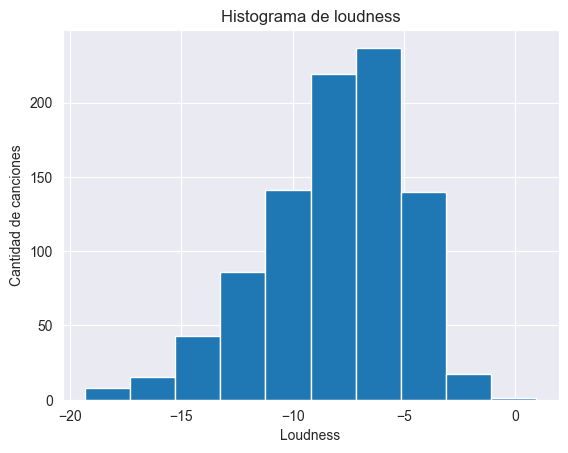

In [47]:
bins = 10

plt.hist(copy_covers_ds['Loudness'], bins = bins)

plt.xlabel('Loudness')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de loudness')
plt.xticks(range(-20, 5, 5))
plt.show()

La gran mayoria de los valores se encuentran entre -10 y -5, y se puede apreciar un ligero sesgo hacia la izquierda. Igualmente nos resultan raro tantos valores de decibeles negativos. 

### Analisis de ```Instrumentalness```

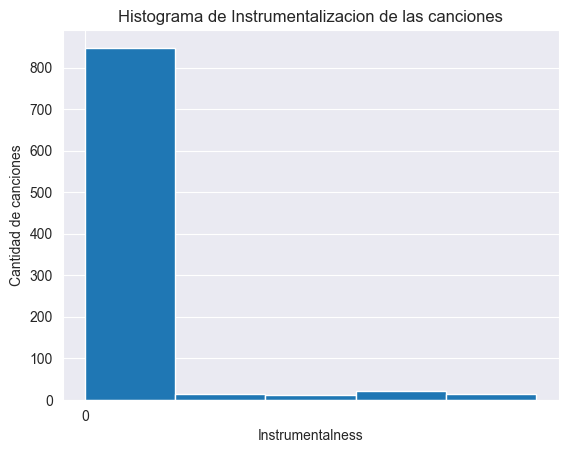

In [48]:
bins = 5

plt.hist(copy_covers_ds['Instrumentalness'], bins = bins)

plt.xlabel('Instrumentalness')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de Instrumentalizacion de las canciones')
plt.xticks(range(0, 1, 1))
plt.show()

Podriamos discretizar la variable, por ejemplo utilizar una escala "nula, baja, media, alta"

In [49]:
#Creamos la nueva columna con las variable discretizada(todavia no hay nada) y la inicializamos en nulo.
copy_covers_ds['Instrumentalness Type'] = pd.NA
#Por cada registro hacemos:
for index,row in copy_covers_ds.iterrows():
    #Consideramos los 4 casos(intervalos) y asignamos el nueva valor segun corresponda
    instrulmentalness_original = row['Instrumentalness']
    if(instrulmentalness_original == 0):
        instrulmentalness_nueva = 'nula'
    elif(instrulmentalness_original > 0 and instrulmentalness_original <= 0.5 ) :
        instrulmentalness_nueva = 'baja'
    elif(instrulmentalness_original > 0.5 and instrulmentalness_original <= 1) :
        instrulmentalness_nueva = 'alta'
        
    copy_covers_ds.at[index,'Instrumentalness Type'] = instrulmentalness_nueva

copy_covers_ds.head()

C:\Users\bural\AppData\Local\Temp\ipykernel_16240\724280457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_covers_ds['Instrumentalness Type'] = pd.NA


,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Instrumentalness Type
0,Everybody Everybody,Black Box,4:11,4,0.645,0.795,7,-12.095,1,0.0527,0.3470,0.003890,0.1040,0.535,112.067,87,1990,baja
1,Close To You,Maxi Priest,3:45,4,0.590,0.727,6,-7.955,1,0.0706,0.0259,0.000065,0.0827,0.356,121.966,85,1990,baja
2,Do Me!,Bell Biv DeVoe,3:56,4,0.615,0.534,9,-6.719,0,0.0386,0.1060,0.000018,0.0607,0.193,135.917,84,1990,baja
3,Everything,Jody Watley,4:05,4,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.243,120.006,82,1990,alta
4,What It Takes,Aerosmith,3:21,4,0.672,0.655,10,-5.021,0,0.0310,0.0362,0.000000,0.1170,0.555,134.948,82,1990,nula


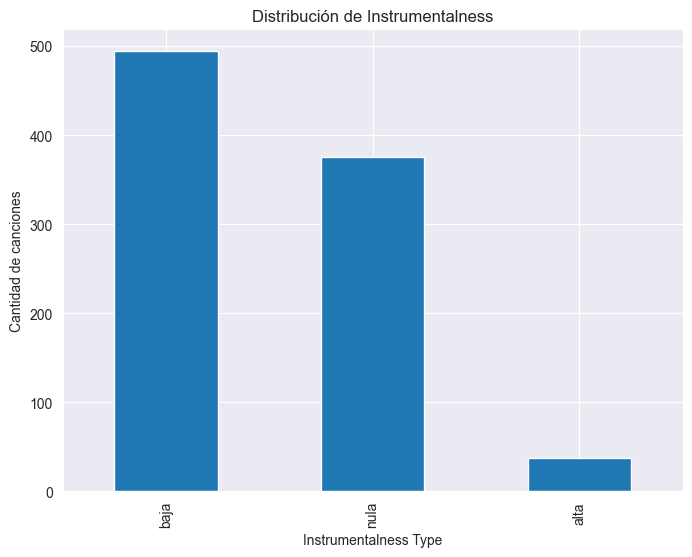

In [50]:
# Contar la cantidad de cada tipo de 'Instrumentalness Type'
instrumentalness_counts = copy_covers_ds['Instrumentalness Type'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
instrumentalness_counts.plot(kind='bar')
plt.title('Distribución de Instrumentalness')
plt.xlabel('Instrumentalness Type')
plt.ylabel('Cantidad de canciones')
plt.show()

Podemos ver que hay muchas canciones con instrumentalizacion baja(cuidado que el intervalo para bajo es un poco mayor(0.1). Y que tambien hay muchas canciones con una instrumentalizacion nula(0 de instrumentalizacion)

### ```Analisis Time Signature```

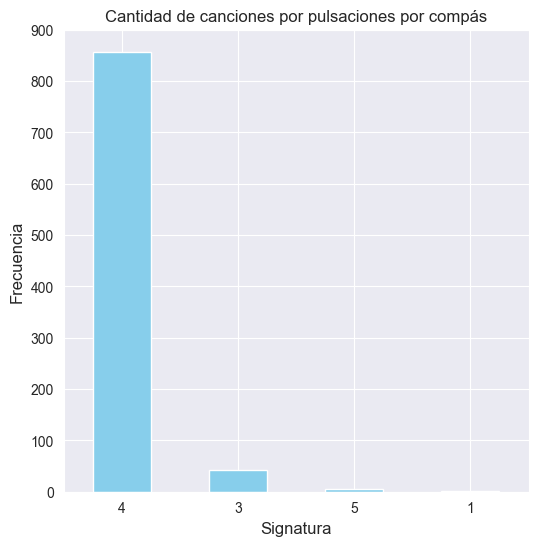

In [51]:
# Contar la cantidad de cada tipo de 'Instrumentalness Type'
Time_signature_counts = copy_covers_ds['Time_Signature'].value_counts()

plt.figure(figsize=(6,6))
Time_signature_counts.plot(kind = 'bar', color='skyblue')
plt.yticks(range(0,901,100))
plt.xticks(rotation = 0)
plt.title('Cantidad de canciones por pulsaciones por compás')
plt.xlabel('Signatura', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

Observamos que la gran mayoria de las canciones tienen 4 pulsaciones por compas, es un compas muy comun. Aquí dejo una captura sacada de la siguiente [página](https://www.skoove.com/blog/es/compases-musicales-conceptos-importantes-y-tipos-de-compases/), contiene informacion de otros compases también. 

!["Compas 4/4"](compas44.png)

### ```Analisis Liveness```

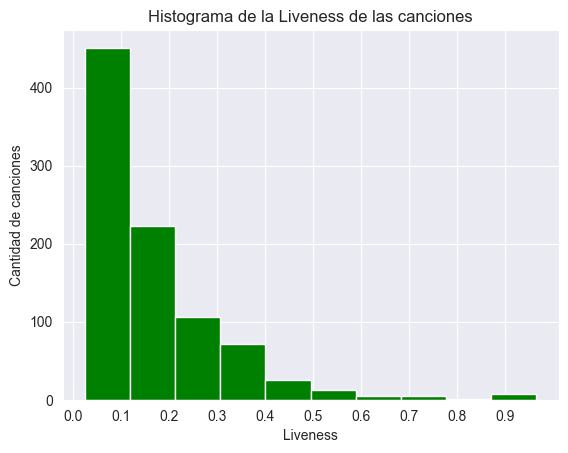

In [52]:
bins = 10

plt.hist(copy_covers_ds['Liveness'], bins = bins,color='green')

plt.xlabel('Liveness')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de la Liveness de las canciones')
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

Vemos una distribucion muy sesgada hacia la derecha, lo que quiere decir que probablemente haya muchas canciones con poca presencia de la audiencia. Hay un par de valor que podrian ser posibles outliers ariba de 0.9 pero realmente no nos parece significante.

### ```Analisis Energy```


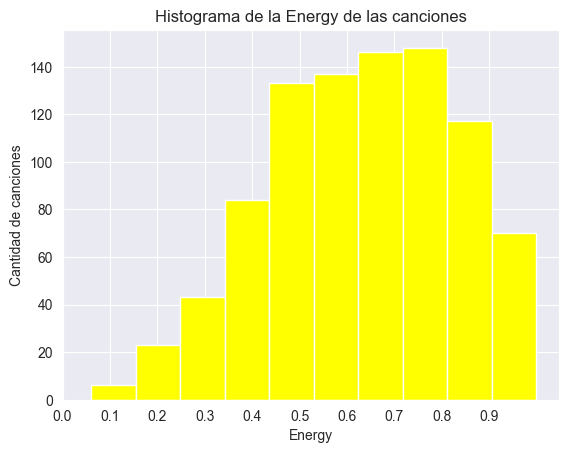

In [53]:
bins = 10

plt.hist(copy_covers_ds['Energy'], bins = bins,color='yellow')

plt.xlabel('Energy')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de la Energy de las canciones')
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

Podemos observar una cuerva bastante ```sesgada hacia la derecha```, lo que indica una gran presencia de canciones energeticas. Sinceramente como con muchas otras variables no sabemos como es que fueron medidas, como pasa en el caso de esta variable. ¿Como midieron la energia de la cancion? ¿estara ligada al ritmo?

Algunas canciones con un valor de ```energia bajo``` son:

In [54]:
copy_covers_ds[copy_covers_ds['Energy'] < 0.1]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Instrumentalness Type
270,Take This Heart,Richard Marx,3:45,3,0.52,0.0604,5,-11.32,1,0.0512,0.986,0.00136,0.107,0.128,118.562,48,1992,baja


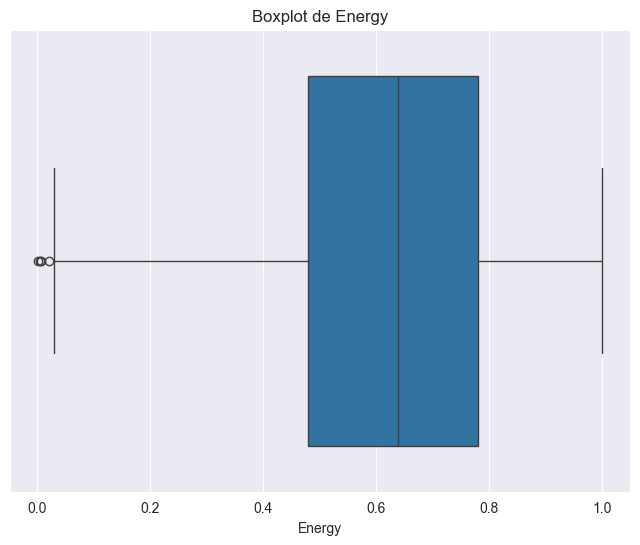

In [55]:
# Nos quedamos solo con la columna Energy
energy = covers_dataset["Energy"]

# Creamos el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=energy)
plt.title("Boxplot de Energy")
plt.xlabel("Energy")
plt.show()

### ```Analisis de Key```

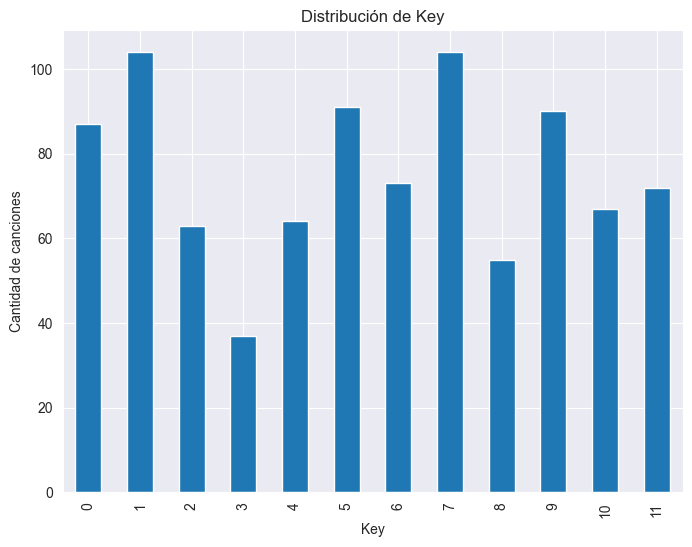

In [56]:
# Contar la cantidad de cada tipo de 'Key'
key_counts = copy_covers_ds['Key'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
key_counts.plot(kind='bar')
plt.title('Distribución de Key')
plt.xlabel('Key')
plt.ylabel('Cantidad de canciones')
plt.show()

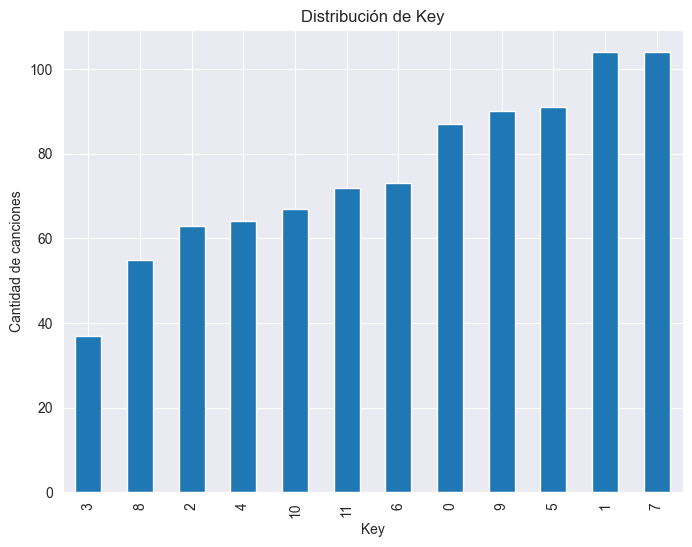

In [57]:
# Contar la cantidad de cada tipo de 'Key'
key_counts = copy_covers_ds['Key'].value_counts().sort_values()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
key_counts.plot(kind='bar')
plt.title('Distribución de Key')
plt.xlabel('Key')
plt.ylabel('Cantidad de canciones')
plt.show()

### Analisis de ```Speechiness```

Es la medida de presencia de palabras habladas en las canciones, valores altos indican una alta presencia de estas palabras.

In [58]:
copy_covers_ds['Speechiness'].describe()

count    907.000000
mean       0.075937
std        0.079800
min        0.023000
25%        0.032200
50%        0.042800
75%        0.076250
max        0.529000
Name: Speechiness, dtype: float64

Es una variable cuantitativa continua

De la funcion describe() se puede ver que hasta el 75% de los datos son valores muy bajos debajo de 0.1

Esto podria significar que la mayoria de las canciones no tienen casi palabras habladas. Con palabras habladas pensamos que una cancion con valores altos seria una cancion de rap por ejemplo. 

Aunque tampoco hay ninguna que sea totalmente hablada, ya que el maximo llega a 0.529.

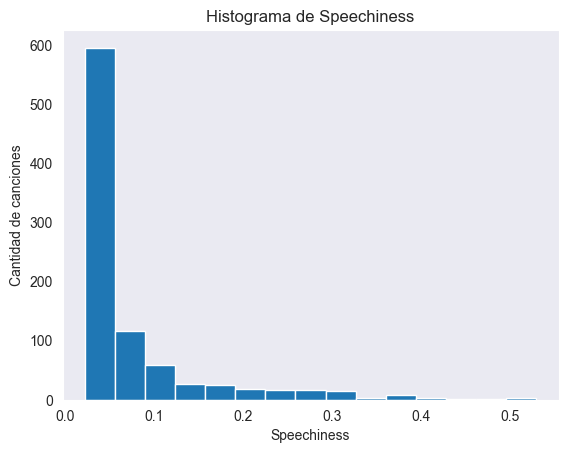

In [59]:
bins = 15

plt.hist(copy_covers_ds['Speechiness'], bins = bins)

plt.xlabel('Speechiness')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de Speechiness')
plt.grid()
plt.show()

Luego de realizar el histograma volvemos a confirmar que hay muchiiisimas canciones con valores bajos.

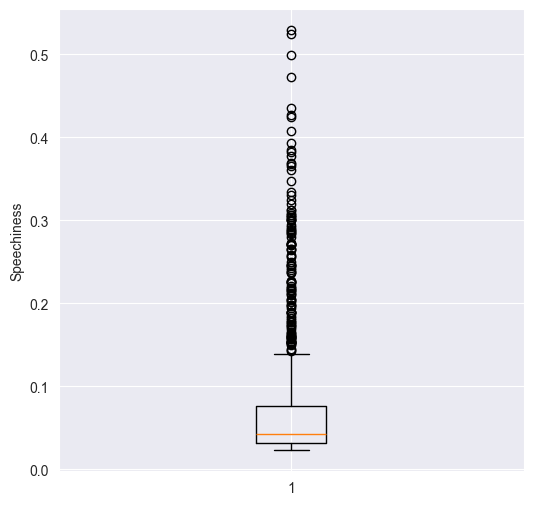

In [60]:
plt.figure(figsize=(6, 6))
plt.boxplot(copy_covers_ds['Speechiness'])
plt.ylabel('Speechiness')
plt.show()

Realizamos el boxplot para ver si quizas habia un valor solo alejado, pero en verdad esta distribuido medio parejo los valores mas alla del 75%. 

In [61]:
max = copy_covers_ds["Speechiness"].max()
copy_covers_ds[copy_covers_ds["Speechiness"] == max]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Instrumentalness Type
873,Steal My Sunshine,Len,4:25,4,0.412,0.829,4,-11.112,1,0.529,0.394,0.0,0.108,0.677,191.476,63,1999,nula


In [62]:
min = copy_covers_ds["Speechiness"].min()
copy_covers_ds[copy_covers_ds["Speechiness"] == min]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Instrumentalness Type
695,Building A Mystery,Sarah McLachlan,4:07,4,0.505,0.518,2,-8.601,1,0.023,0.403,0.0,0.129,0.472,81.019,52,1997,nula


Para chusmear un poco más, la cancion con el maximo de Speechiness es algo como Hip Hop, Pop Rap según lo que buscamos. Tiene sentido quiza que este ahi pero tampoco es que sea re hablada, es un valor de 0.529.

Y la cancion con el minimo de Speechiness tiene una onda triste, lenta y bien cantada. Pd: descubrimos que la artista es la que canta "When She Loved Me" de Toy Story 2 c':

### ```Análisis de Mode```

Como tenemos una variable categórica, podemos modelarla mediante un gráfico de barras, donde podamos apreciar la cantidad de canciones de cada categoría

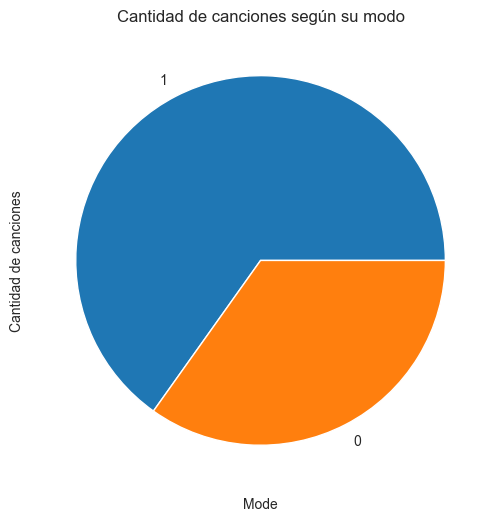

In [63]:
#Contamos la cantidad de canciones de cada tipo
mode_values = copy_covers_ds['Mode'].value_counts()

plt.figure(figsize=(8, 6))
mode_values.plot(kind='pie', color='green')
plt.title('Cantidad de canciones según su modo')
plt.xticks(rotation=0)
plt.xlabel('Mode')
plt.ylabel('Cantidad de canciones')
plt.show()


Se aprecia que hay muchas más canciones escritas en escala mayor que en escala menor. Según esta [página](https://www.artsmusica.net/teoria-musical/diferencia-entre-escalas-mayores-y-menores/), una canción compuesta por una escala mayor da una sensación de alegría, mientras que a las que se conforman por escalas menores se les atribuye sentimientos más tristes o depresivos. Por lo tanto, sería de especial interés comprobar si existe una relación entre ```Mode``` con la variable que mide los niveles de positividad de la canción, ```Valance```.

### ```Análisis de Acoustiness```

Ahora vamos a realizar el análisis sobre la variable que mide que tan acústica es una canción. Como se trata de una variable cuantitativa continua, vamos a discretizarla de manera tal de poder modelar su distribución en un histograma y/o boxplot 

In [64]:
copy_covers_ds['Acousticness'].value_counts()

Acousticness
0.11800    5
0.21500    5
0.10700    4
0.11400    4
0.43400    4
          ..
0.65500    1
0.00373    1
0.39400    1
0.07710    1
0.39600    1
Name: count, Length: 667, dtype: int64

In [65]:
copy_covers_ds['Acousticness'].describe()

count    907.000000
mean       0.222169
std        0.245969
min        0.000004
25%        0.028950
50%        0.118000
75%        0.333500
max        0.986000
Name: Acousticness, dtype: float64

* Como se puede ver, el 75% de los datos se encuentran en el rango de 0.00 a 0.34 aprox mientras que el otro 25% se encuentra entre 0.34 y 0.99, por lo tanto, si se la grafica se podría apreciar un sesgo a derecha debido a ese porcentaje de datos restante
* Aunque la mayoría de los datos son pequeños, hay cierta dispersión y unos cuantos valores más altos que contribuyen a que la desviación estándar un poco más alta en comparación con la media

Ahora que conocemos la distribución de los datos, podemos optar por realizar una discretización de la variable de dos formas: equal-depth o entropy-based(equal-width no debido a que no maneja bien distribuciones sesgadas)<br>
Como tenemos 919 datos, podemos hacer 20 intervalos con, aproximadamente, 46 valores en cada uno

**_Preguntar si cada bin tiene la misma cantidad de datos y, en caso contrario, como lo podemos hacer para que eso_**

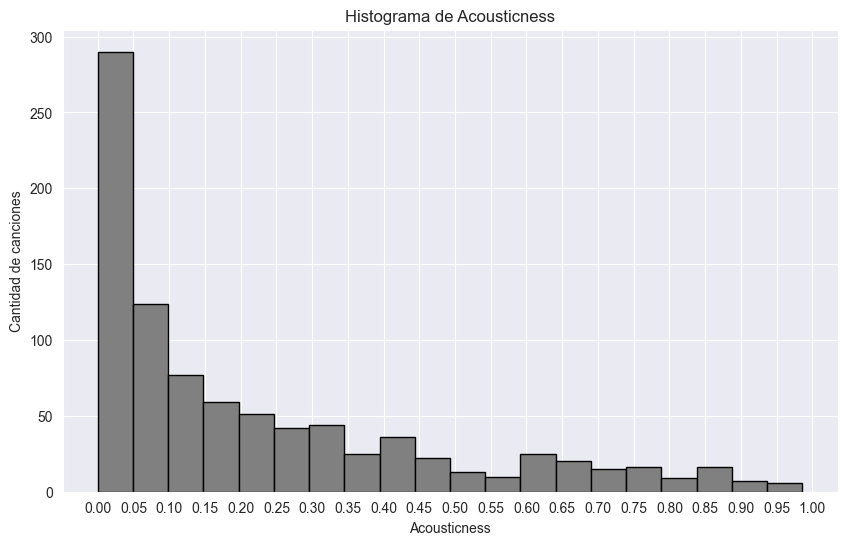

In [66]:
# Ordenamos los datos
acousticness_sort = copy_covers_ds['Acousticness'].sort_values()

# Definimos el número de intervalos (bins)
bins = 20

# Graficamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(acousticness_sort, bins=bins, color='grey', edgecolor='black')

# Añadimos título y etiquetas
plt.title('Histograma de Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Cantidad de canciones')
plt.xticks(np.arange(0,1.05,0.05))

# Mostramos el gráfico
plt.show()
##

El gráfico confirma lo que ya pensabamos, existe un fuerte sesgo a derecha. La mayoría de las canciones tienen un nivel acústico muy leve. Es decir, pocas canciones usan instrumentos acústicos(ej: violin, corno francés, trombón, saxofón, guitarra acústica, etc.

### Análisis de ```Year```

El año de lanzamiento es una variable de tipo cuantitativa discreta. Debido a que es un dataset de los años '90, tenemos canciones del 90 al 99.

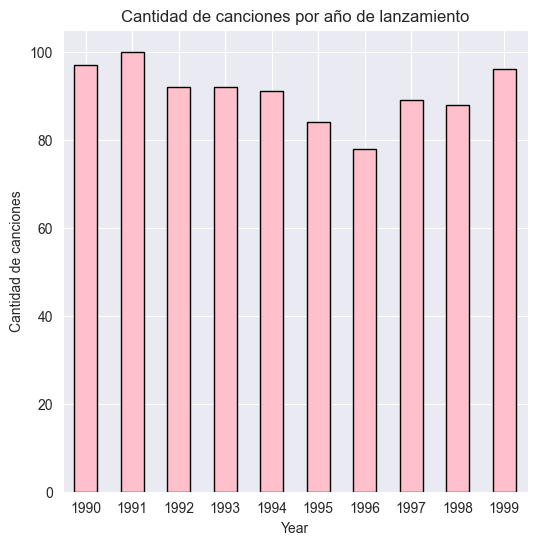

In [67]:
Year_counts = copy_covers_ds['Year'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
Year_counts.plot(kind='bar', color='pink', edgecolor='black' )
plt.xlabel('Year')
plt.ylabel('Cantidad de canciones')
plt.title('Cantidad de canciones por año de lanzamiento')
plt.xticks(rotation=0)
plt.show()

Podemos ver que se lanzaron más canciones en el año 1991, y menos en el 1996. En un futuro podríamos ver como se relaciona esto con la popularidad de las canciones.

### Análisis de ```Tempo```

La velocidad de la pista es una variable cuantitativa continua, por lo que podemos modelarla mediante un histograma

In [68]:
copy_covers_ds['Tempo'].value_counts()

Tempo
118.777    3
100.002    3
168.007    2
120.006    2
119.957    2
          ..
98.572     1
113.722    1
127.969    1
71.582     1
112.067    1
Name: count, Length: 861, dtype: int64

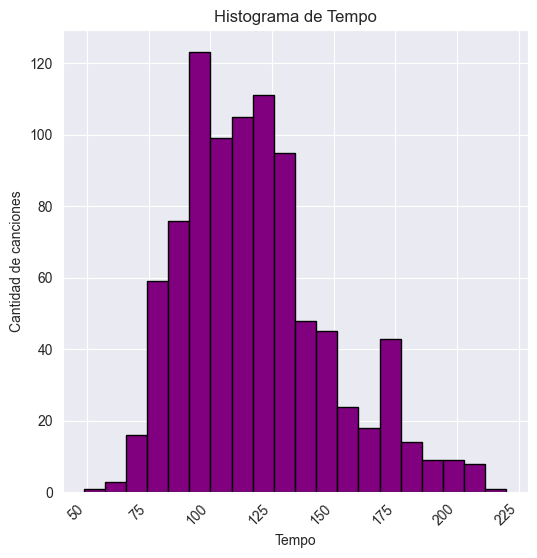

In [69]:
# Ordenamos los datos
tempo_sort = copy_covers_ds['Tempo'].sort_values()

# Definimos el número de intervalos (bins)
bins = 20

# Graficamos el histograma
plt.figure(figsize=(6, 6))
plt.hist(tempo_sort, bins=bins, color='purple', edgecolor='black')

# Añadimos título y etiquetas
plt.title('Histograma de Tempo')
plt.xlabel('Tempo')
plt.ylabel('Cantidad de canciones')
#plt.xticks(range(45,230,10))
plt.xticks(rotation=45, ha='right')
# Mostramos el gráfico
plt.show()
##

En el histograma y, según información que encontramos en [esta fuente](https://hacercanciones.com/tutorial/el-tempo-y-la-musica/), la mayoría de las canciones tienen un ritmo medio tendiendo a rápido.<br>
La canción más rápida es:

In [70]:
max = copy_covers_ds["Tempo"].max()
copy_covers_ds[copy_covers_ds["Tempo"] == max]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Instrumentalness Type
564,I’ll Be There For You/You’re All I Need To Get,by Method Man featuring Mary J. Blige,1:40,4,0.629,0.646,2,-7.775,0,0.112,0.000088,0.88,0.099,0.17,219.973,0,1995,alta


Y la más lenta:

In [71]:
min = copy_covers_ds["Tempo"].min()
copy_covers_ds[copy_covers_ds["Tempo"] == min]

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,Instrumentalness Type
203,Tennessee,Arrested Development,4:53,4,0.392,0.37,9,-10.888,1,0.0298,0.205,0.0096,0.0821,0.512,48.718,83,1992,baja


Dando una escucha a ambas canciones no nos pareció que ninguna correspondía al tempo registrado en el dataset. ¿Quizás los covers que se hicieron sobre esas canciones estaban en distinto tempo respecto al original? 

### Analisis de ```Danceability vs Energy```

NameError: name 'stats' is not defined

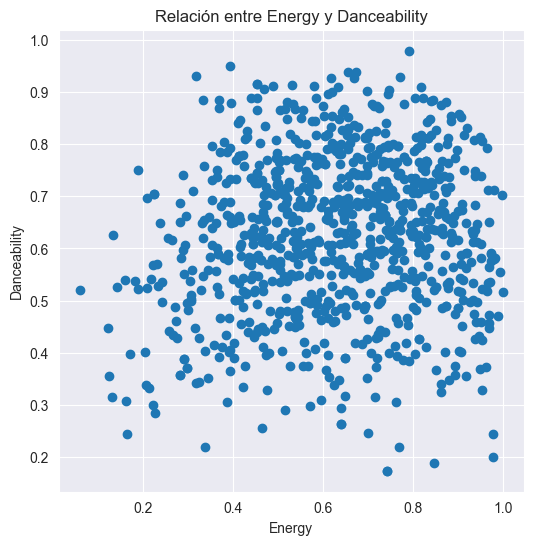

In [73]:
variable_1 = "Energy"
variable_2 = "Danceability"

# Extraer las columnas del DataFrame
datos_columna1 = copy_covers_ds[variable_1]
datos_columna2 = copy_covers_ds[variable_2]

# creamos el scatter plot
plt.figure(figsize=(6, 6))  
plt.scatter(copy_covers_ds[variable_1], copy_covers_ds[variable_2])
plt.xlabel(variable_1)
plt.ylabel(variable_2)
plt.title("Relación entre {} y {}".format(variable_1, variable_2))

# calcular la correlación de Pearson usando SciPy
coeficiente_correlacion, _ = stats.pearsonr(datos_columna1, datos_columna2)
# agregar la leyenda con el valor del coeficiente de correlación
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.grid(True)
plt.show()

 simple vista solo se ve una nube de puntos sin direccion. La correlacion dda muy baja, del 0.13. No logramos detectar visualmente si podria llegar a existir otro tipo de relacion que no sea lineal.

## Análisis de correlaciones entre variables

Con los resultados obtenidos mediante el análisis univariado realizado previamente, sacamos distintas hipótesis sobre las variables que podrían ser de sumo interés para sacar conclusiones de valor. Ahora nos centraremos en indagar sobre la veracidad de esas suposiciones mediante un análisis bivariado 

Hipótesis 1: Dependiendo del nivel de positividad de la canción(Valence), una canción puede ser más rápida o más lenta(Tempo)

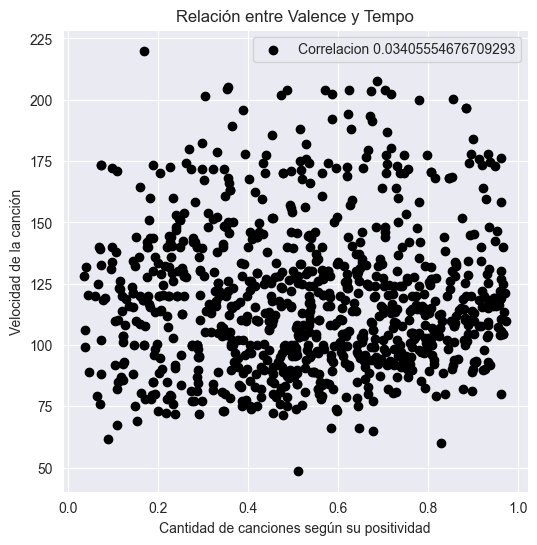

In [74]:
#Primero vamos a crear el scatter plot
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

#Calculamos el coeficiente de correlación con numpy
coeficiente_correlacion = np.corrcoef(copy_covers_ds['Valence'], copy_covers_ds['Tempo'])[0,1]

# Graficamos el scatter
plt.scatter(copy_covers_ds['Valence'], copy_covers_ds['Tempo'], label=f'Correlacion {coeficiente_correlacion}', color='black')

# Agregamos las etiquetas a los ejes
plt.xlabel("Cantidad de canciones según su positividad")
plt.ylabel("Velocidad de la canción")

# Agregamos el título
plt.title("Relación entre Valence y Tempo")

# Agregamos una leyenda
plt.legend()

# Mostramos el gráfico de dispersión
plt.show()

## Analisis de ```Liveness vs Popularity```

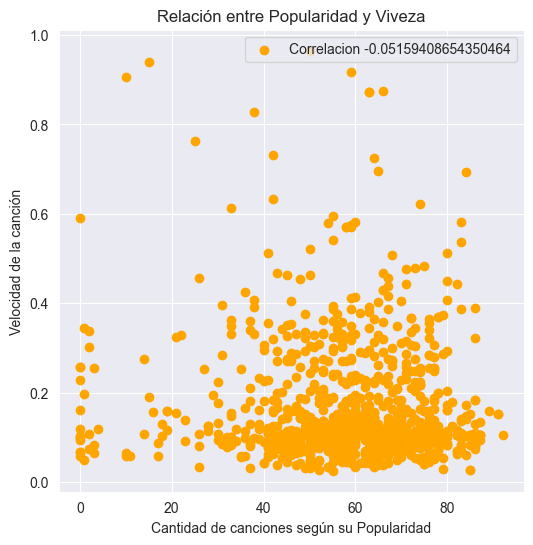

In [75]:
#Primero vamos a crear el scatter plot
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

#Calculamos el coeficiente de correlación con numpy
coeficiente_correlacion = np.corrcoef(copy_covers_ds['Popularity'], copy_covers_ds['Liveness'])[0,1]

# Graficamos el scatter
plt.scatter(copy_covers_ds['Popularity'], copy_covers_ds['Liveness'], label=f'Correlacion {coeficiente_correlacion}', color='orange')

# Agregamos las etiquetas a los ejes
plt.xlabel("Cantidad de canciones según su Popularidad")
plt.ylabel("Velocidad de la canción")

# Agregamos el título
plt.title("Relación entre Popularidad y Viveza")

# Agregamos una leyenda
plt.legend()

# Mostramos el gráfico de dispersión
plt.show()

No importaba que p valor planteramos que nustras hipotesis seria rechazada, si supondriamos una confianza del 0.95 o de 0.7 no llegabamos ni aunque quiesieramos. El valor de correlacion muy cercano a 0 supondria que ambas variables son altamente independientes entre si o tienen un relacion que no es lineal. En el Scatter plot si miramos bien muy difusamente se puede ver una especie de parabola aunque no bien definida. Lo que si podemos asegurar es que no existe una relacion lineal entre ambas. Una mayor presencia de audiencia en el track no supone una mayor popularidad.

In [76]:
copy_covers_ds.describe()

,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,3.951488,0.626065,0.630042,5.435502,-8.100806,0.651599,0.075937,0.222169,0.043193,0.172322,0.535718,118.912936,57.771775,1994.413451
std,0.265503,0.151518,0.195033,3.506062,3.153500,0.476727,0.079800,0.245969,0.155259,0.138637,0.243739,29.605926,17.598971,2.926992
min,1.000000,0.174000,0.060400,0.000000,-19.310000,0.000000,0.023000,0.000004,0.000000,0.025000,0.034800,48.718000,0.000000,1990.000000
25%,4.000000,0.520000,0.492500,2.000000,-10.010500,0.000000,0.032200,0.028950,0.000000,0.088850,0.345500,97.068500,49.000000,1992.000000
50%,4.000000,0.633000,0.640000,6.000000,-7.556000,1.000000,0.042800,0.118000,0.000005,0.119000,0.536000,115.035000,60.000000,1994.000000
75%,4.000000,0.738500,0.780500,9.000000,-5.733000,1.000000,0.076250,0.333500,0.000615,0.218500,0.730500,133.424000,70.000000,1997.000000
max,5.000000,0.979000,0.999000,11.000000,0.919000,1.000000,0.529000,0.986000,0.958000,0.965000,0.975000,219.973000,92.000000,1999.000000


Antes de PCA: (907, 10)
Después de PCA: (907, 2)


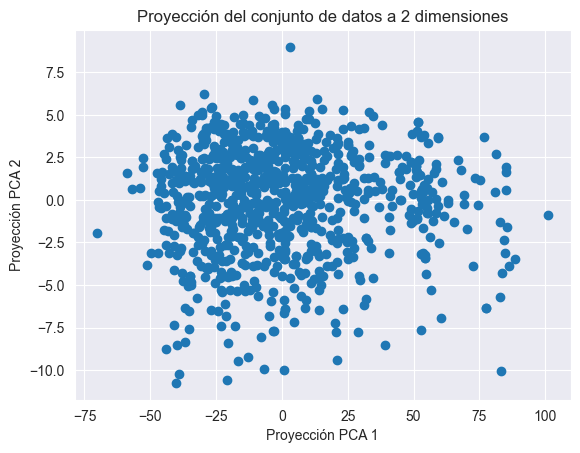

In [77]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Sacamos todo lo que no sea continuo
X = copy_covers_ds.drop(['Duration', 'Mode','Track','Artist','Key','Year','Popularity','Instrumentalness Type'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# declaramos un objeto PCA que mapee n dimensions a p=2, y que además
# normalice esas features (whiten=True)
pca = PCA(n_components=2, whiten=False)
# le pedimos al objeto que se ajuste utilizando los datos (fit) y que además
# transforme los datos, para ya reducir a dos dimensiones
principalComponents = pca.fit_transform(X)
# imprimimos los tamaños antes y después
print('Antes de PCA: {}'.format(X.shape))
print('Después de PCA: {}'.format(principalComponents.shape))

# graficamos los datos. el color de cada punto representa el valor de la casa
plt.scatter(principalComponents[:,0], principalComponents[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

In [78]:
pca.__dict__

{'n_components': 2,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'feature_names_in_': array(['Time_Signature', 'Danceability', 'Energy', 'Loudness',
        'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
        'Valence', 'Tempo'], dtype=object),
 'n_features_in_': 10,
 '_fit_svd_solver': 'covariance_eigh',
 'mean_': array([ 3.95148842e+00,  6.26065050e-01,  6.30042337e-01, -8.10080595e+00,
         7.59368247e-02,  2.22169285e-01,  4.31929955e-02,  1.72322492e-01,
         5.35717751e-01,  1.18912936e+02]),
 'noise_variance_': np.float64(0.03388318246698191),
 'n_samples_': 907,
 'n_components_': 2,
 'components_': array([[-1.66873849e-04, -8.24921173e-04,  9.16677087e-04,
          1.18641166e-02,  3.27831800e-04, -9.80559884e-04,
          1.21871408e-04, -2.34644935e-04,  2.81819158e-04,
          9.99928235e-01],
        [ 6.94366

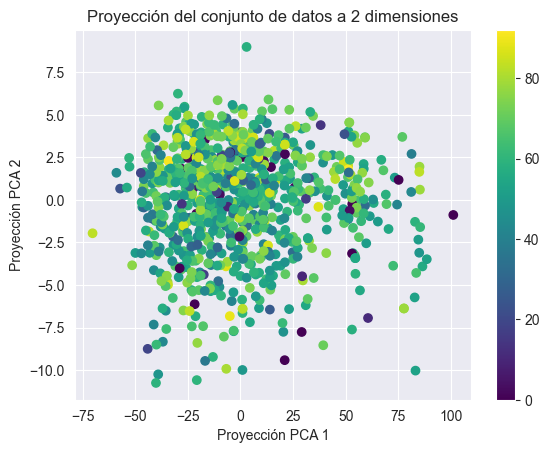

In [79]:
# graficamos los datos. el color de cada punto representa el valor de la casa
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=copy_covers_ds["Popularity"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

Before t-SNE: (907, 10)
After t-SNE: (907, 2)


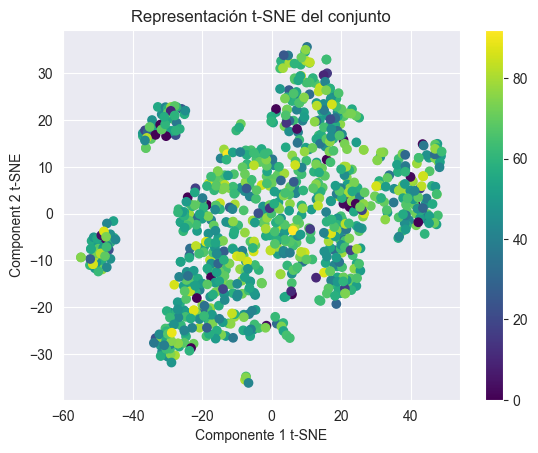

In [80]:
# importamos el t-SNE
from sklearn.manifold import TSNE

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
#X_tsne = TSNE(n_components=2).fit_transform(X_train_stand) # sin random state
X_tsne = TSNE(n_components=2, random_state=10).fit_transform(X_scaled)  # con random state
# imprimimos los tamaños antes y después
print('Before t-SNE: {}'.format(X_scaled.shape))
print('After t-SNE: {}'.format(X_tsne.shape))

# graficamos los datos, el color de cada punto representa el valor de la casa
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=copy_covers_ds["Popularity"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto')
plt.colorbar()
plt.show()

Se ve que en ambos casos no hay una relacion entre las demas caracteristicas del dataset y la popularidad.

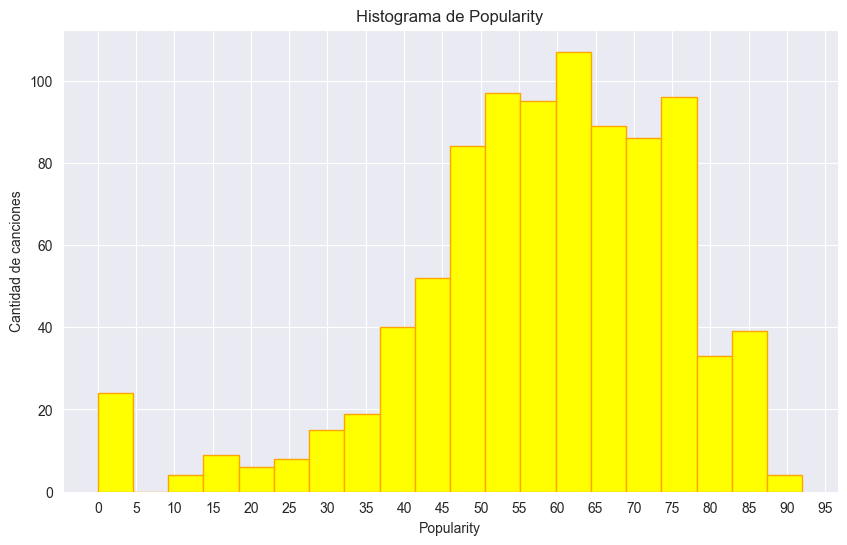

In [81]:
import numpy as np

# Ordenamos los datos
popularity_sort = copy_covers_ds['Popularity'].sort_values()

# Definimos el número de intervalos (bins)
bins = 20

# Graficamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(popularity_sort, bins=bins, color='yellow', edgecolor='orange')

# Añadimos título y etiquetas
plt.title('Histograma de Popularity')
plt.xlabel('Popularity')
plt.ylabel('Cantidad de canciones')
plt.xticks(np.arange(0,100,5))

# Mostramos el gráfico
plt.show()

Podemos separar por la moda. Para hacer un analisis de que tan significativa estadisticamente es la diferencia entre el promedio de liveness entre ambos grupos

In [82]:

copy_covers_ds['Popularity_groups'] = pd.NA
#Por cada registro hacemos:
for index,row in copy_covers_ds.iterrows():
    
    popularidad = row['Popularity']
    if popularidad >= 60:
        popularity_group = 'upper_group'
    elif popularidad < 60:
        popularity_group = 'lower_group'
        
    copy_covers_ds.at[index,'Popularity_groups'] = popularity_group

C:\Users\bural\AppData\Local\Temp\ipykernel_16240\1636169261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_covers_ds['Popularity_groups'] = pd.NA


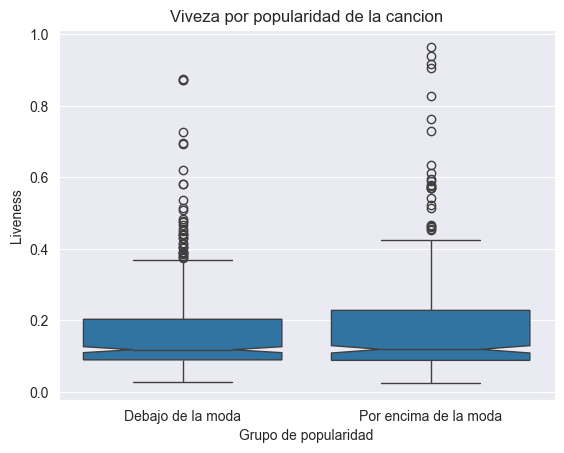

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x='Popularity_groups', y='Liveness', data=copy_covers_ds, notch=True)
plt.title("Viveza por popularidad de la cancion")
plt.xlabel("Grupo de popularidad")
plt.xticks(ticks=[0, 1], labels=["Debajo de la moda", "Por encima de la moda"])
plt.ylabel("Liveness")
plt.show()


Un monton de outliers! Ya por el acogotamiento se podria decir que la diferencia no va a ser significativa. Pero vamos a darle un toque mas empirico al analisis.

In [84]:
copy_covers_ds = copy_covers_ds[copy_covers_ds['Liveness'] < 0.4]

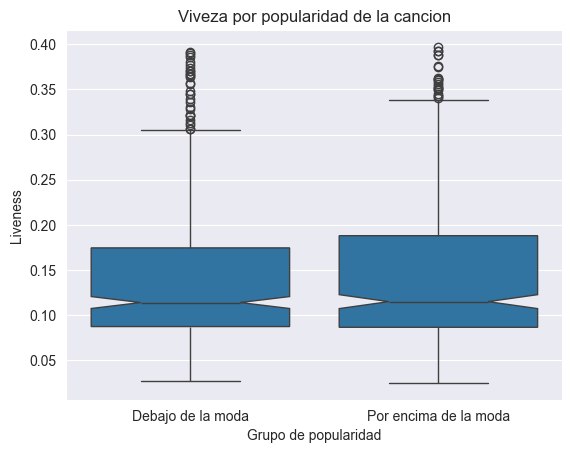

In [85]:
sns.boxplot(x='Popularity_groups', y='Liveness', data=copy_covers_ds, notch=True)
plt.title("Viveza por popularidad de la cancion")
plt.xlabel("Grupo de popularidad")
plt.xticks(ticks=[0, 1], labels=["Debajo de la moda", "Por encima de la moda"])
plt.ylabel("Liveness")
plt.show()

In [86]:
from scipy.stats import shapiro

# Separamos los datos en dos grupos, desarrollados y en vías de desarrollo
upper_mode_songs = copy_covers_ds[copy_covers_ds['Popularity_groups'] == 'upper_group']['Liveness']
lower_mode_songs = copy_covers_ds[copy_covers_ds['Popularity_groups'] == 'lower_group']['Liveness']

# Test de Shapiro-Wilk para países desarrollados
stat, p = shapiro(upper_mode_songs)
print(f"Test de Shapiro-Wilk para canciones por encima de la moda: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para países en vías de desarrollo
stat, p = shapiro(lower_mode_songs)
print(f"Test de Shapiro-Wilk para canciones por debajo de la mdoa: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para canciones por encima de la moda: Estadístico=0.871, p-valor=0.000
Test de Shapiro-Wilk para canciones por debajo de la mdoa: Estadístico=0.873, p-valor=0.000


p valores muy cercanos a 0, no son normales. Chau test t. Veamos homocedasticidad.

In [87]:
import scipy.stats as stats
stat, p = stats.levene(upper_mode_songs, lower_mode_songs)
print(f"Test de Levene para Liveness entre ambos grupos de canciones: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Liveness entre ambos grupos de canciones: Estadístico=3.106, p-valor=0.078


p valor por encima de 0.05, que alegria!! yuppie!!, se corrobora que son homocedasticos. Hagamos Mann Whitney!

In [88]:

stat, p = stats.mannwhitneyu(upper_mode_songs, lower_mode_songs)
print(f"Test de Mann-Whitney : Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en en Liveness de las canciones por encima de la moda y por debajo")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el Liveness en las canciones por encima de la moda y por debajo")

Test de Mann-Whitney : Estadístico=88918.500, p-valor=0.654
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en en Liveness de las canciones por encima de la moda y por debajo


Como habiamo predicho al inicio desde el analisis visual del acogotamiento de los box plots no existe una diferencia significativa para poder asegurar que el liveness de las canciones es diferente.

Pero no nos rindamos aca!, puede haber una relacion entre liveness y el Mode(tono mayor o tono menor) de las canciones.

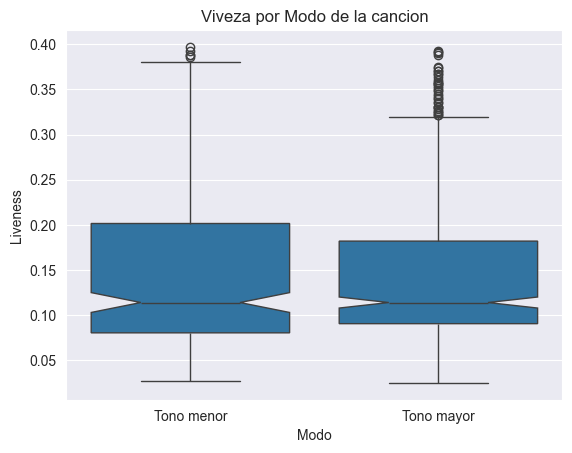

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x='Mode', y='Liveness', data=copy_covers_ds, notch=True)
plt.title("Viveza por Modo de la cancion")
plt.xlabel("Modo")
plt.xticks(ticks=[0, 1], labels=["Tono menor", "Tono mayor"])
plt.ylabel("Liveness")
plt.show()

In [90]:
copy_covers_ds = copy_covers_ds[copy_covers_ds['Liveness'] < 0.4]

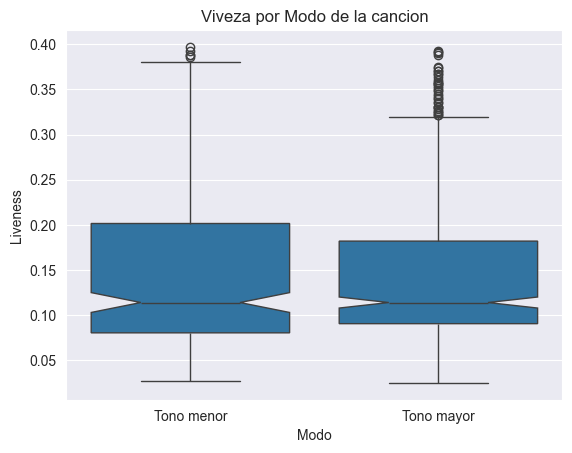

In [91]:
sns.boxplot(x='Mode', y='Liveness', data=copy_covers_ds, notch=True)
plt.title("Viveza por Modo de la cancion")
plt.xlabel("Modo")
plt.xticks(ticks=[0, 1], labels=["Tono menor", "Tono mayor"])
plt.ylabel("Liveness")
plt.show()

In [92]:
from scipy.stats import shapiro

# Separamos los datos en dos grupos, desarrollados y en vías de desarrollo
tono_alto = copy_covers_ds[copy_covers_ds['Mode'] == 1]['Liveness']
tono_bajo = copy_covers_ds[copy_covers_ds['Mode'] == 0]['Liveness']

# Test de Shapiro-Wilk para países desarrollados
stat, p = shapiro(tono_alto)
print(f"Test de Shapiro-Wilk para canciones con tono alto: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para países en vías de desarrollo
stat, p = shapiro(tono_bajo)
print(f"Test de Shapiro-Wilk para canciones con tono bajo: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Shapiro-Wilk para canciones con tono alto: Estadístico=0.870, p-valor=0.000
Test de Shapiro-Wilk para canciones con tono bajo: Estadístico=0.870, p-valor=0.000


No es normal! :)

In [93]:
stat, p = stats.levene(tono_alto, tono_bajo)
print(f"Test de Levene para Liveness: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Liveness: Estadístico=5.134, p-valor=0.024


No son homosedasticos, hay que ir a los no parametricos! : Kruskal Wallis

In [94]:
# Test de Kruskal-Wallis para comparar GDP_per_capita entre países desarrollados y en vías de desarrollo
stat, p = stats.kruskal(tono_alto, tono_bajo)
print(f"Test de Kruskal-Wallis para Liveness: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el Liveness entre canciones de tono alto y tono bajo.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el Liveness entre canciones de tono alto y tono bajo.")

Test de Kruskal-Wallis para Liveness: Estadístico=0.541, p-valor=0.462
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en el Liveness entre canciones de tono alto y tono bajo.


Como podemos ver no llegamos a nada, la diferencia no es la suficiente como par apoder asegurar algo! que triste...

### Analisis de ```Danceability vs Energy```

In [ ]:
variable_1 = "Energy"
variable_2 = "Danceability"

# Extraer las columnas del DataFrame
datos_columna1 = copy_covers_ds[variable_1]
datos_columna2 = copy_covers_ds[variable_2]

# creamos el scatter plot
plt.figure(figsize=(6, 6))  
plt.scatter(copy_covers_ds[variable_1], copy_covers_ds[variable_2])
plt.xlabel(variable_1)
plt.ylabel(variable_2)
plt.title("Relación entre {} y {}".format(variable_1, variable_2))

# calcular la correlación de Pearson usando SciPy
coeficiente_correlacion, _ = stats.pearsonr(datos_columna1, datos_columna2)
# agregar la leyenda con el valor del coeficiente de correlación
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.grid(True)
plt.show()

 simple vista solo se ve una nube de puntos sin direccion. La correlacion dda muy baja, del 0.13. No logramos detectar visualmente si podria llegar a existir otro tipo de relacion que no sea lineal.